#### Introduction to Types and Generic Programming

In [106]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.6.0")
# uncomment to force package installation and precompilation
# github_project("QuantEcon/quantecon-notebooks-julia", version="0.6.0", instantiate=true, precompile = true)
using LinearAlgebra, Statistics
using Distributions, Plots, QuadGK, Polynomials, Interpolations

Activated /Users/yurimatsumura/Project.toml
Info quantecon-notebooks-julia 0.5.0 activated, 0.6.0 requested


In [11]:


x = (1, 2.0, "test")


y = (a = 1, b = 2.0, c = "test")



@show typeof(1.0 + 1im)
@show typeof(ones(2, 2))
@show typeof(x)
@show typeof(y);

typeof(1.0 + 1im) = Complex{Float64}
typeof(ones(2, 2)) = Array{Float64,2}
typeof(x) = Tuple{Int64,Float64,String}
typeof(y) = NamedTuple{(:a, :b, :c),Tuple{Int64,Float64,String}}


Complex, Array, Tuple, and NamedTuple are called Prametric type. 

In [12]:
Array <: Number 

false

In [13]:
using Base: show_supertypes

show_supertypes(Int64)

Int64 <: Signed <: Integer <: Real <: Number <: Any

In [15]:
x1 = [1, 2, 3]
x2 = [1.0, 2.0, 3.0]

@show typeof(x1)
@show typeof(x2);

typeof(x1) = Array{Int64,1}
typeof(x2) = Array{Float64,1}


In [16]:
function f(x, A)
    b = [5.0, 6.0]
    return A * x .+ b
end

val = f([0.1, 2.0], [1.0 2.0; 3.0 4.0])

2-element Array{Float64,1}:
  9.1
 14.3

In [18]:
typeof(Diagonal([1.0,2.0]))

Diagonal{Float64,Array{Float64,1}}

In [19]:
@show f([0.1; 2.0], [1 2; 3 4])
@show f([0.1; 2.0], Diagonal([1.0, 2.0]))

f([0.1; 2.0], [1 2; 3 4]) = [9.1, 14.3]
f([0.1; 2.0], Diagonal([1.0, 2.0])) = [5.1, 10.0]


2-element Array{Float64,1}:
  5.1
 10.0

In [20]:
struct FooNotTyped  # immutable by default, use `mutable struct` otherwise
    a # BAD! not typed
    b
    c
end

In [21]:
struct Foo
    a::Float64
    b::Int64
    c::Vector{Float64}
end

In [25]:
foo_nt = FooNotTyped(2.0, 3, [1.0, 2.0, 3.0])
foo = Foo(2.0, 3, [1.0, 2.0, 3.0]) # creates a new `Foo`

@show typeof(foo)
@show foo.a       # get the value for a field
@show foo.b
@show foo.c;

@show typeof(foo_nt)
@show foo_nt.a       # get the value for a field
@show foo_nt.b
@show foo_nt.c;


struct Foo2
    a::Float64
    b::Integer  # BAD! Not a concrete type
    c::Vector{Real}  # BAD! Not a concrete type
end

foo2 = Foo(2.0, 3, [1.0, 2.0, 3.0])

@show typeof(foo2)
@show foo2.a       # get the value for a field
@show foo2.b
@show foo2.c;



# foo.a = 2.0     # fails since it is immutable

typeof(foo) = Foo
foo.a = 2.0
foo.b = 3
foo.c = [1.0, 2.0, 3.0]
typeof(foo_nt) = FooNotTyped
foo_nt.a = 2.0
foo_nt.b = 3
foo_nt.c = [1.0, 2.0, 3.0]
typeof(foo2) = Foo
foo2.a = 2.0
foo2.b = 3
foo2.c = [1.0, 2.0, 3.0]


In [29]:
f(x) = x.a + x.b + sum(x.c) # use the type
a = 2.0
b = 3
c = [1.0, 2.0, 3.0]
foo = Foo(a, b, c)
@show f(foo)

# some other typed for the values
a = 2   # not a floating point but `f()` would work
b = 3
c = [1.0, 2.0, 3.0]'   # transpose is not a `Vector` but `f()` would work
foo_1 = Foo(a, b, c)   # fails to compile
@show f(foo_1)

f(foo) = 11.0


MethodError: MethodError: no method matching Array{Float64,1}(::Adjoint{Float64,Array{Float64,1}})
Closest candidates are:
  Array{Float64,1}(::AbstractArray{S,N}) where {T, N, S} at array.jl:541
  Array{Float64,1}() where T at boot.jl:424
  Array{Float64,1}(!Matched::UndefInitializer, !Matched::Int64) where T at boot.jl:405
  ...

In this case, foo_1 does not work becuase a and c do not match the type defined in Foo.
Then to be flexible for type, declear ambiguously may be effective.

In [30]:
struct Foo3{T1, T2, T3}
    a::T1   # could be any type
    b::T2
    c::T3
end

# works fine
a = 2
b = 3
c = [1.0, 2.0, 3.0]'    # transpose is not a `Vector` but `f()` would work
foo = Foo3(a, b, c)
@show typeof(foo)
f(foo)

typeof(foo) = Foo3{Int64,Int64,Adjoint{Float64,Array{Float64,1}}}


11.0

In [32]:
@show typeof([1.0, 2.0, 3.0])
@show eltype([1.0, 2.0, 3.0]);

typeof([1.0, 2.0, 3.0]) = Array{Float64,1}
eltype([1.0, 2.0, 3.0]) = Float64


In [33]:
?eltype

search: eltype fieldtype fieldtypes base_color_type base_colorant_type



```
eltype(type)
```

Determine the type of the elements generated by iterating a collection of the given `type`. For dictionary types, this will be a `Pair{KeyType,ValType}`. The definition `eltype(x) = eltype(typeof(x))` is provided for convenience so that instances can be passed instead of types. However the form that accepts a type argument should be defined for new types.

# Examples

```jldoctest
julia> eltype(fill(1f0, (2,2)))
Float32

julia> eltype(fill(0x1, (2,2)))
UInt8
```

---

```
eltype(sc)
```

Returns the (key,value) type (a 2-entry pair, i.e., `Pair{K,V}`) for SortedDict and SortedMultiDict. Returns the key type for SortedSet. This function may also be applied to the type itself. Time: O(1)

---

```
eltype(sc)
```

Returns the (key,value) type (a 2-entry pair, i.e., `Pair{K,V}`) for SortedDict and SortedMultiDict. Returns the key type for SortedSet. This function may also be applied to the type itself. Time: O(1)

---

```
eltype(sc)
```

Returns the key type for SortedSet. This function may also be applied to the type itself. Time: O(1)

---

```
eltype(s::Sampleable)
```

The default element type of a sample. This is the type of elements of the samples generated by the `rand` method. However, one can provide an array of different element types to store the samples using `rand!`.

---

```
eltype(d::MultivariateDistribution)
```

Return the sample type of distribution `d`


In [134]:
function ourabs(x::Int64)
    if x > zero(x)   # note, not 0!
        return x
    else
        return - x
    end
end

@show ourabs(1);

ourabs(1) = 1


In [1]:
using Plots, ForwardDiff


slopes(f_x::AbstractVector, x::AbstractRange) = diff(f_x) / step(x)
# operator to get the derivative of this function using AD
D(f) = x -> ForwardDiff.derivative(f, x)

# compare slopes with AD for sin(x)
f(x) = x^2
f_x = f.(x)
q(x) = sin(x)
x = 0.0:0.1:4.0
q_x = q.(x)
q_slopes_x = slopes(q_x, x)

D_q_x = D(q).(x)  # broadcasts AD across vector

plot(x[1:end-1], D_q_x[1:end-1], label = "q' with AD")
plot!(x[1:end-1], q_slopes_x, label = "q slopes")

┌ Info: Precompiling ForwardDiff [f6369f11-7733-5829-9624-2563aa707210]
└ @ Base loading.jl:1260


UndefVarError: UndefVarError: x not defined

### Exercises

In [55]:
# Exercise 1

using StaticArrays
using LinearAlgebra
using BenchmarkTools


N = 3
A = rand(N, N)
x = rand(N)

@btime $A * $x  # the $ in front of variable names is sometimes important
@btime inv($A)




A_s = @SMatrix rand(N, N)
x_s = @SVector rand(N)

@btime $A_s * $x_s  # the $ in front of variable names is sometimes important
@btime inv($A_s);



  83.903 ns (1 allocation: 112 bytes)
  695.497 ns (5 allocations: 1.98 KiB)
  0.050 ns (0 allocations: 0 bytes)
  8.373 ns (0 allocations: 0 bytes)


In [56]:
# Exercise 2

using StaticArrays
using LinearAlgebra
using BenchmarkTools

Σ = [0.4  0.3;
     0.3  0.45]
G = I
R = 0.5 * Σ

gain(Σ, G, R) = Σ * G' * inv(G * Σ * G' + R)
@btime time = gain($Σ, $G, $R)


Σ_s = @SMatrix [0.4  0.3; 0.3  0.45] #Use StaticArrays 
G_s = I
R_s == 0.5 * Σ #Use StaticArrays 

gain(Σ_s, G_s, R_s) = Σ_s * G_s' * inv(G_s * Σ_s * G_s' + R_s)
@btime time_s = gain($Σ_s, $G_s, $R_s)



  874.333 ns (10 allocations: 1.94 KiB)
  13.702 ns (0 allocations: 0 bytes)


2×2 SArray{Tuple{2,2},Float64,2,4} with indices SOneTo(2)×SOneTo(2):
 0.666667     1.11022e-16
 2.22045e-16  0.666667

(p(0.1), p′(0.1)) = (1.52, -4.6)
roots(p) = [0.5, 2.0]
typeof(p′) = Poly{Int64}


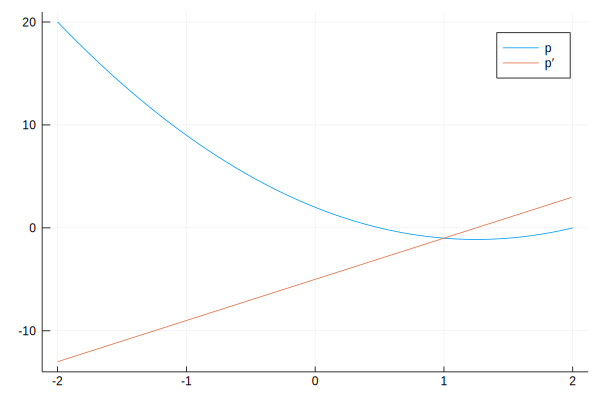

In [144]:
#Exercise 3


using Polynomials
using Plots

p = Poly([2, -5, 2], :x)  # :x just gives a symbol for display
p′ = polyder(p)   # gives the derivative of p, another polynomial

@show p(0.1), p′(0.1)  # call like a function
@show roots(p);   # find roots such that p(x) = 0
@show typeof(p′) 

x = -2:0.01:2
p_x = p.(x)
p′_x = p′.(x)


plot(x[1:end], p_x[1:end],label = "p") 
plot!(x[1:end-1], p′_x[1:end-1],label = "p′")

In [195]:
#Exercise 4


using Polynomials
using BenchmarkTools


function newtonsmethod(p::Poly, x_0; tolerance = 1E-100, maxiter = 500)
    x_old = x_0
    normdiff = Inf
    iter = 1
    p′ = polyder(p)
    while normdiff > tolerance  && iter <= maxiter
        x_new = x_old - p(x_old)/p′(x_old)
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return x_old # show elements in a vector without duplication
end



function newtonsmethod_result(x_initial)
    result = zeros(length(x_initial))
    for i in 1:length(x_initial)
        result[i] = newtonsmethod(p,x_initial[i])
    end
    return unique(result)
end 
    

p = Poly([2, -5, 2], :x)  # :x just gives a symbol for display
@show p
@show newtonsmethod_result(randn(100))
@show roots(p)

@btime newtonsmethod_result(randn(100))
@btime roots(p);




p = Poly(2 - 5*x + 2*x^2)
newtonsmethod_result(randn(100)) = [0.5, 2.0]
roots(p) = [0.5, 2.0]
  39.430 μs (708 allocations: 39.84 KiB)
  1.520 μs (23 allocations: 2.33 KiB)


In [178]:
x_0[2]

0.0

trapezoidal_1(f_x, x) = 0.33333754198126314
trapezoidal_2(f_x, x) = 0.33333754198126314
trapezoidal_3(f, x_l, x_u, N) = 0.33333754198126314
(value, accuracy) = quadgk(f, 0.0, 1.0) = (0.3333333333333333, 5.551115123125783e-17)


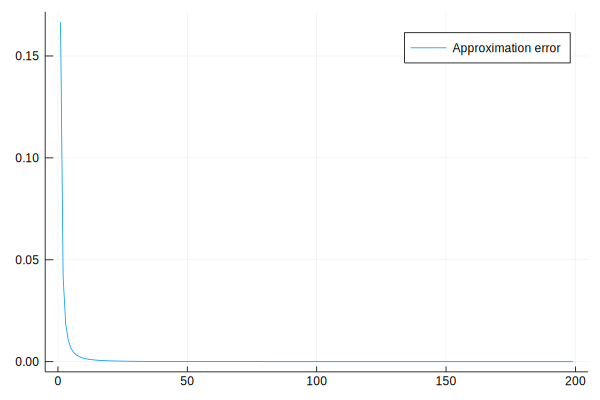

In [136]:
#Exercise 5 

using QuadGK, Plots



function trapezoidal_1(f::AbstractArray ,x::AbstractArray)
    f_n = zeros(length(x)-1) 
    for n in 1:length(x)-1
        f_n[n] = (x[n + 1] - x[n])*(f[n] + f[n + 1])/2   #note that there is a typo in definition Δx
    end
    return sum(f_n)
end



function trapezoidal_2(f::AbstractArray ,x::AbstractRange)
    f_n = zeros(length(x)-1) 
    for n in 1:length(x)-1
        f_n[n] = (x[n + 1] - x[n])*(f[n] + f[n + 1])/2
    end
    return sum(f_n)
end

function trapezoidal_3(f::Function, x_l, x_u, N)
    f_n = zeros(N)
    step = (x_u - x_l)/N
    X = range(x_l, x_u,length = N)
    for n in 1:N-1
        f_n[n] = (X[n+1] - X[n])*(f(X[n+1]) + f(X[n]))/2
    end
    return sum(f_n)
end



x = range(0.0, 1.0, length = 200)
x_l = 0.0
x_u = 1.0
N = 200
f(x) = x^2
f_x = f.(x)


@show trapezoidal_1(f_x,x)
@show trapezoidal_2(f_x,x)
@show trapezoidal_3(f,x_l, x_u, N)


@show value, accuracy = quadgk(f,0.0,1.0)



error = zeros(N-1) 
for n in 2:N
    error[n-1] =  abs(value - trapezoidal_3(f,x_l, x_u, n)) 
end 
plot(error, label = "Approximation error")

In [165]:
#Exercise 6  (incomplete)

using Plots, ForwardDiff


function trapezoidal_3(f, x_l, x_u, N)
    f_n = zeros(N)
    step = (x_u - x_l)/N
    X = range(x_l, x_u,length = N)
    for n in 1:N-1
        f_n[n] = (X[n+1] - X[n])*(f(X[n+1]) + f(X[n]))/2
    end
    return sum(f_n)
end

x_l = 0.0
x_u = 1.0
N = 200
f(x) = x^2

g = x -> trapezoidal_3(f, x_l, x, N)

@show g(1.0)

Df(z) = ForwardDiff.derivative(y -> trapezoidal_3(f, x_l, y, N),z)

Df(1.0)




g(1.0) = 0.33333754198126314


MethodError: MethodError: no method matching Float64(::ForwardDiff.Dual{ForwardDiff.Tag{var"#97#98",Float64},Float64,1})
Closest candidates are:
  Float64(::Real, !Matched::RoundingMode) where T<:AbstractFloat at rounding.jl:200
  Float64(::T) where T<:Number at boot.jl:715
  Float64(!Matched::Int8) at float.jl:60
  ...

In [ ]:
# more efficient version


function trapezoidal_4(f::Function, x_l, x_u, N)
    x = range(x_l,x_u, length = N)
    ω = step(x) * [0.5;ones(length(x) - 2);0.5]
    return dot(f.(x),ω )
end

